In [1]:
%load_ext autoreload
%autoreload 2
import os, sys
sys.path.append('..')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster")
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (11,8)
from merf.merf import MERF
from sklearn.model_selection import train_test_split
from merf.evaluator import plot_bhat, plot_training_stats

# Sleep Study

We evaluate the performance of MERF on a famous sleep study dataset with 180 samples and 18 clusters (with 10 samples each). 

In [2]:
sleep_df = pd.read_csv('../data/sleepstudy.csv')

Text(0,0.5,'Reaction')

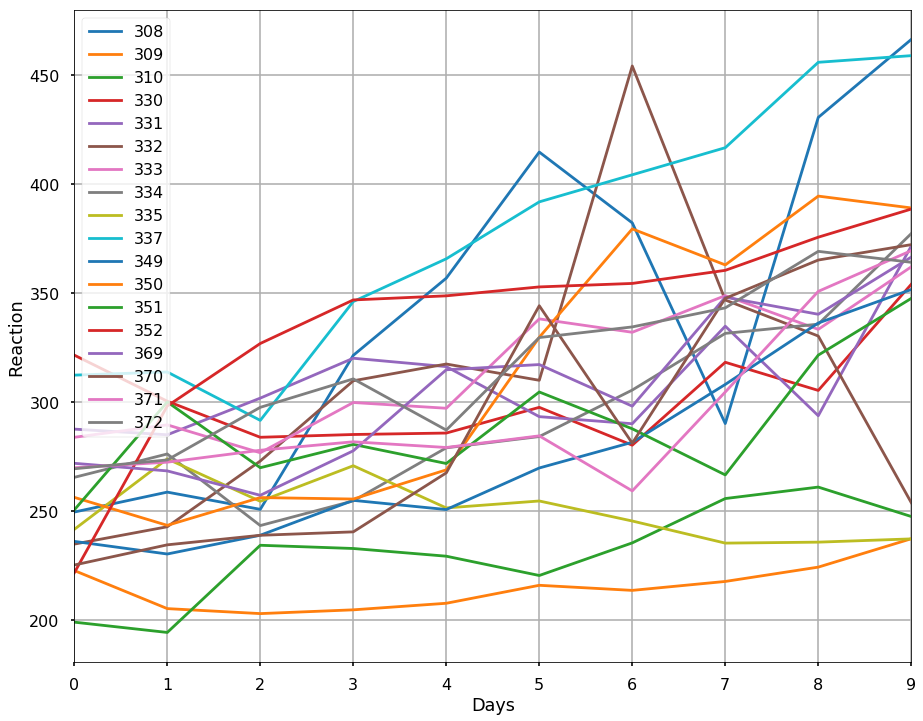

In [3]:
fig, ax = plt.subplots(figsize=(15,12))
for label, group in sleep_df.groupby('Subject'):
    group.plot(x='Days', y='Reaction', ax=ax, label=label)
plt.legend()
plt.grid('on')
plt.ylabel('Reaction')

In [4]:
sleep_df.head()

,Unnamed: 0,Reaction,Days,Subject
0,1,249.5600,0,308
1,2,258.7047,1,308
2,3,250.8006,2,308
3,4,321.4398,3,308
4,5,356.8519,4,308


INFO     [merf.py:235] GLL is 1428.749557088927 at iteration 1.
INFO     [merf.py:235] GLL is 1425.5519247941138 at iteration 2.
INFO     [merf.py:235] GLL is 1427.5016491580543 at iteration 3.
INFO     [merf.py:235] GLL is 1426.223170709782 at iteration 4.
INFO     [merf.py:235] GLL is 1426.8582308869234 at iteration 5.
INFO     [merf.py:235] GLL is 1425.3316283769757 at iteration 6.
INFO     [merf.py:235] GLL is 1426.213538434854 at iteration 7.
INFO     [merf.py:235] GLL is 1427.1921105283773 at iteration 8.
INFO     [merf.py:235] GLL is 1427.2937595034323 at iteration 9.
INFO     [merf.py:235] GLL is 1426.158543998992 at iteration 10.
INFO     [merf.py:235] GLL is 1426.6317845949256 at iteration 11.
INFO     [merf.py:235] GLL is 1426.189895300844 at iteration 12.
INFO     [merf.py:235] GLL is 1427.3712529491766 at iteration 13.
INFO     [merf.py:235] GLL is 1425.8500253947238 at iteration 14.
INFO     [merf.py:235] GLL is 1425.7749213064371 at iteration 15.
INFO     [merf.py:235] G

Text(0.5,1,'MSE RF = 9.011, MSE MERF = 6.332')

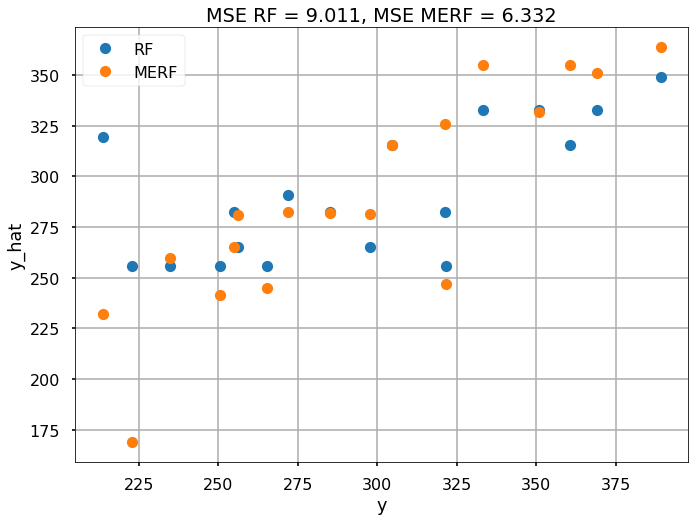

In [5]:
train, test = train_test_split(sleep_df, test_size=0.1, shuffle=True)
y = test['Reaction']

# Random Forest Training and Prediction
rf = RandomForestRegressor(n_estimators=100)
rf.fit(train[['Days']], train['Reaction'])
yhat_rf = rf.predict(test[['Days']])

# Mixed Effects Random Forest Training
mrf = MERF(n_estimators=100, max_iterations=20)
X_train =  train[['Days']]
Z_train = np.ones((len(X_train), 1))
clusters_train = train['Subject']
y_train = train['Reaction']
mrf.fit(X_train, Z_train, clusters_train, y_train)

# Mixed Effects Random Forest Test
X_test =  test[['Days']]
Z_test = np.ones((len(X_test), 1))
clusters_test = test['Subject']
yhat_mrf = mrf.predict(X_test, Z_test, clusters_test)

# Compute MSE
mse_rf = np.sqrt(np.sum((y - yhat_rf)**2)) / len(y)
mse_mrf = np.sqrt(np.sum((y - yhat_mrf)**2)) / len(y)

# Plot Scatter Plot of error
plt.plot(y, yhat_rf, 'o', label='RF')
plt.plot(y, yhat_mrf, 'o', label='MERF')
plt.grid('on')
plt.xlabel('y')
plt.ylabel('y_hat')

plt.legend()
plt.title('MSE RF = {:.3f}, MSE MERF = {:.3f}'.format(mse_rf, mse_mrf))

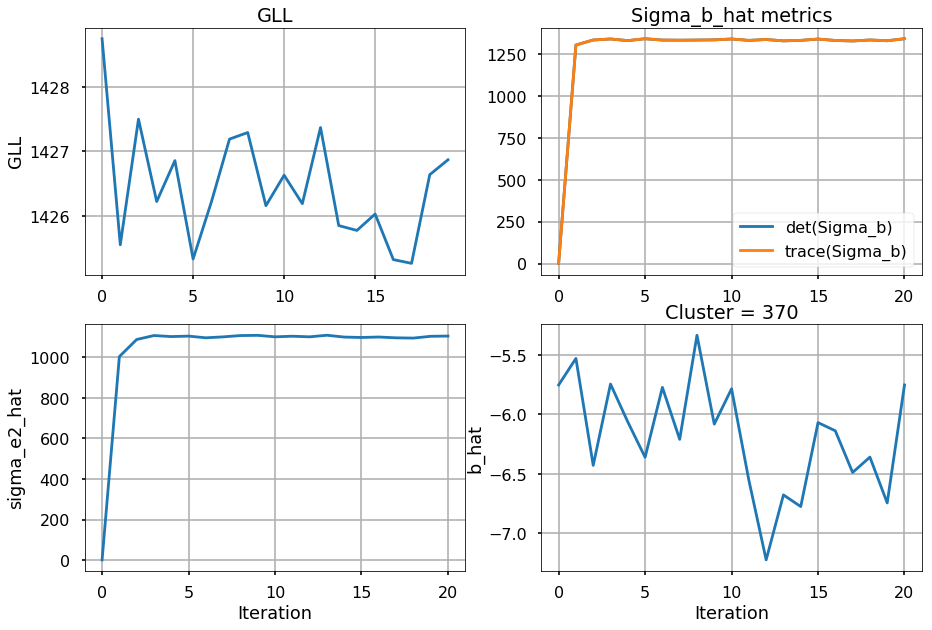

In [6]:
plot_training_stats(mrf)

/Users/souravdey/.virtualenvs/merf/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  """Entry point for launching an IPython kernel.


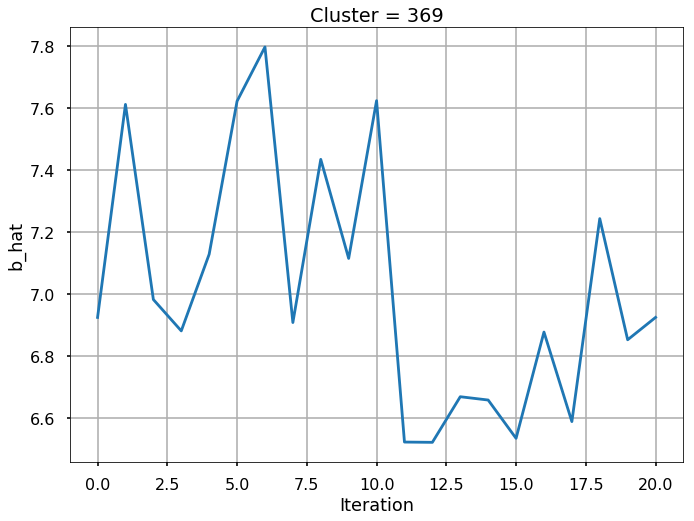

In [10]:
bb = plot_bhat(mrf, 2)

# Radon

We evaluate the performance of MERF on the famous Minnesota radon dataset. 

In [11]:
radon_df = pd.read_csv('../data/radon.csv')

In [12]:
radon_df.head()

,Unnamed: 0,idnum,state,state2,stfips,zip,region,typebldg,floor,room,...,pcterr,adjwt,dupflag,zipflag,cntyfips,county,fips,Uppm,county_code,log_radon
0,0,5081.0,MN,MN,27.0,55735,5.0,1.0,1.0,3.0,...,9.7,1146.499190,1.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
1,1,5082.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,...,14.5,471.366223,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
2,2,5083.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,...,9.6,433.316718,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,1.098612
3,3,5084.0,MN,MN,27.0,56469,5.0,1.0,0.0,4.0,...,24.3,461.623670,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.095310
4,4,5085.0,MN,MN,27.0,55011,3.0,1.0,0.0,4.0,...,13.8,433.316718,0.0,0.0,3.0,ANOKA,27003.0,0.428565,1,1.163151


In [13]:
radon_df[['floor', 'Uppm', 'county', 'log_radon']].head()

,floor,Uppm,county,log_radon
0,1.0,0.502054,AITKIN,0.832909
1,0.0,0.502054,AITKIN,0.832909
2,0.0,0.502054,AITKIN,1.098612
3,0.0,0.502054,AITKIN,0.095310
4,0.0,0.428565,ANOKA,1.163151


INFO     [merf.py:235] GLL is 144.0473266866692 at iteration 1.
INFO     [merf.py:235] GLL is 110.10771752813245 at iteration 2.
INFO     [merf.py:235] GLL is 97.67996889339562 at iteration 3.
INFO     [merf.py:235] GLL is 89.89324236685829 at iteration 4.
INFO     [merf.py:235] GLL is 83.58751035358733 at iteration 5.
INFO     [merf.py:235] GLL is 81.91034660646946 at iteration 6.
INFO     [merf.py:235] GLL is 79.06294240994785 at iteration 7.
INFO     [merf.py:235] GLL is 77.29503373098908 at iteration 8.
INFO     [merf.py:235] GLL is 76.1699970755716 at iteration 9.
INFO     [merf.py:235] GLL is 75.68967487461278 at iteration 10.
INFO     [merf.py:235] GLL is 75.4119359305933 at iteration 11.
INFO     [merf.py:235] GLL is 75.39640330979023 at iteration 12.
INFO     [merf.py:235] GLL is 75.57687698395387 at iteration 13.
INFO     [merf.py:235] GLL is 75.13635093305295 at iteration 14.
INFO     [merf.py:235] GLL is 75.2679688662967 at iteration 15.
INFO     [merf.py:235] GLL is 75.213

INFO     [merf.py:235] GLL is 75.75060821165613 at iteration 128.
INFO     [merf.py:235] GLL is 76.00351341841166 at iteration 129.
INFO     [merf.py:235] GLL is 76.27652499438736 at iteration 130.
INFO     [merf.py:235] GLL is 75.26883290818726 at iteration 131.
INFO     [merf.py:235] GLL is 75.02557408822949 at iteration 132.
INFO     [merf.py:235] GLL is 74.28637944147005 at iteration 133.
INFO     [merf.py:235] GLL is 74.87980398543652 at iteration 134.
INFO     [merf.py:235] GLL is 75.26083575017181 at iteration 135.
INFO     [merf.py:235] GLL is 76.158107920044 at iteration 136.
INFO     [merf.py:235] GLL is 75.22763847438809 at iteration 137.
INFO     [merf.py:235] GLL is 75.91906958287368 at iteration 138.
INFO     [merf.py:235] GLL is 74.95068268490662 at iteration 139.
INFO     [merf.py:235] GLL is 75.38117722382708 at iteration 140.
INFO     [merf.py:235] GLL is 75.38143719622182 at iteration 141.
INFO     [merf.py:235] GLL is 75.46350669634617 at iteration 142.
INFO     [me

INFO     [merf.py:235] GLL is -64.60056966212493 at iteration 53.
INFO     [merf.py:235] GLL is -63.7583663448496 at iteration 54.
INFO     [merf.py:235] GLL is -64.5058555817627 at iteration 55.
INFO     [merf.py:235] GLL is -66.07614072843852 at iteration 56.
INFO     [merf.py:235] GLL is -63.662789712205736 at iteration 57.
INFO     [merf.py:235] GLL is -65.93235289958764 at iteration 58.
INFO     [merf.py:235] GLL is -65.89306203978659 at iteration 59.
INFO     [merf.py:235] GLL is -65.93403620814827 at iteration 60.
INFO     [merf.py:235] GLL is -67.18066753429622 at iteration 61.
INFO     [merf.py:235] GLL is -67.05429818363852 at iteration 62.
INFO     [merf.py:235] GLL is -67.3467793640138 at iteration 63.
INFO     [merf.py:235] GLL is -66.89499685949164 at iteration 64.
INFO     [merf.py:235] GLL is -68.6064640422737 at iteration 65.
INFO     [merf.py:235] GLL is -65.95270167868448 at iteration 66.
INFO     [merf.py:235] GLL is -67.30398076284229 at iteration 67.
INFO     [mer

INFO     [merf.py:235] GLL is -110.52176286117952 at iteration 176.
INFO     [merf.py:235] GLL is -111.82997250318137 at iteration 177.
INFO     [merf.py:235] GLL is -111.7539212520403 at iteration 178.
INFO     [merf.py:235] GLL is -110.91465479449693 at iteration 179.
INFO     [merf.py:235] GLL is -112.3396191970319 at iteration 180.
INFO     [merf.py:235] GLL is -112.93683904859536 at iteration 181.
INFO     [merf.py:235] GLL is -114.46596464336056 at iteration 182.
INFO     [merf.py:235] GLL is -112.16154884387394 at iteration 183.
INFO     [merf.py:235] GLL is -114.0492052303843 at iteration 184.
INFO     [merf.py:235] GLL is -115.47559247147736 at iteration 185.
INFO     [merf.py:235] GLL is -114.82788126533045 at iteration 186.
INFO     [merf.py:235] GLL is -116.20980130761444 at iteration 187.
INFO     [merf.py:235] GLL is -115.73254278651933 at iteration 188.
INFO     [merf.py:235] GLL is -116.77969393174476 at iteration 189.
INFO     [merf.py:235] GLL is -116.32661662631772 a

INFO     [merf.py:235] GLL is -350.09748244200966 at iteration 99.
INFO     [merf.py:235] GLL is -350.02231540473286 at iteration 100.
INFO     [merf.py:235] GLL is -350.7351248473657 at iteration 101.
INFO     [merf.py:235] GLL is -350.7634813208728 at iteration 102.
INFO     [merf.py:235] GLL is -351.68356907458036 at iteration 103.
INFO     [merf.py:235] GLL is -351.2562291212568 at iteration 104.
INFO     [merf.py:235] GLL is -352.50279404325823 at iteration 105.
INFO     [merf.py:235] GLL is -353.2289222087215 at iteration 106.
INFO     [merf.py:235] GLL is -352.5386638546044 at iteration 107.
INFO     [merf.py:235] GLL is -353.48832278397435 at iteration 108.
INFO     [merf.py:235] GLL is -354.5960934830967 at iteration 109.
INFO     [merf.py:235] GLL is -354.81174322225735 at iteration 110.
INFO     [merf.py:235] GLL is -354.9870965930171 at iteration 111.
INFO     [merf.py:235] GLL is -356.1909569921175 at iteration 112.
INFO     [merf.py:235] GLL is -356.9203609219306 at itera

Text(0.5,1,'MSE RF = 0.092, MSE MERF = 0.089, MSE MERF+Uppm = 0.088, MSE MERF all = 0.090')

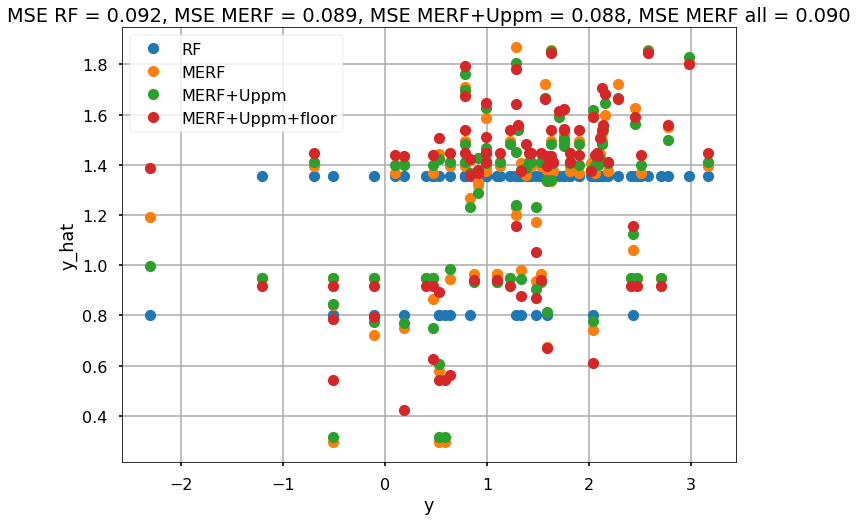

In [27]:
max_iter = 200
train, test = train_test_split(radon_df, test_size=0.1, shuffle=True)
y = test['log_radon']

# Random Forest Training and Prediction
rf = RandomForestRegressor(n_estimators=100)
rf.fit(train[['floor']], train['log_radon'])
yhat_rf = rf.predict(test[['floor']])

# Mixed Effects Random Forest Training
mrf = MERF(n_estimators=100, max_iterations=max_iter)
X_train =  train[['floor']]
Z_train = np.ones((len(X_train), 1))
clusters_train = train['county']
y_train = train['log_radon']
mrf.fit(X_train, Z_train, clusters_train, y_train)

# Mixed Effects Random Forest Test
X_test =  test[['floor']]
Z_test = np.ones((len(X_test), 1))
clusters_test = test['county']
yhat_mrf = mrf.predict(X_test, Z_test, clusters_test)

# Mixed Effects Random Forest Training with County-level covariate (uranium)
mrf_uranium = MERF(n_estimators=100, max_iterations=max_iter)
X_train =  train[['floor']]
Z_train = np.array((np.ones(len(X_train)), train['Uppm'])).T
clusters_train = train['county']
y_train = train['log_radon']
mrf_uranium.fit(X_train, Z_train, clusters_train, y_train)

# Mixed Effects Random Forest Test with County-level covariate (uranium)
X_test =  test[['floor']]
Z_test = np.array((np.ones(len(X_test)), test['Uppm'])).T
clusters_test = test['county']
yhat_mrf_uranium = mrf_uranium.predict(X_test, Z_test, clusters_test)

# Mixed Effects Random Forest Training with County-level covariate (uranium) and Fixed Effect Covariate as random effect
mrf_all = MERF(n_estimators=100, max_iterations=max_iter)
X_train =  train[['floor']]
Z_train = np.array((np.ones(len(X_train)), train['Uppm'], train['floor'])).T
clusters_train = train['county']
y_train = train['log_radon']
mrf_all.fit(X_train, Z_train, clusters_train, y_train)

# Mixed Effects Random Forest Test with County-level covariate (uranium) and Fixed Effect Covariate as random effect
X_test =  test[['floor']]
Z_test = np.array((np.ones(len(X_test)), test['Uppm'], test['floor'])).T
clusters_test = test['county']
yhat_mrf_all = mrf_all.predict(X_test, Z_test, clusters_test)

# Compute MSE
mse_rf = np.sqrt(np.sum((y - yhat_rf)**2)) / len(y)
mse_mrf = np.sqrt(np.sum((y - yhat_mrf)**2)) / len(y)
mse_mrf_uranium = np.sqrt(np.sum((y - yhat_mrf_uranium)**2)) / len(y)
mse_mrf_all = np.sqrt(np.sum((y - yhat_mrf_all)**2)) / len(y)

# Plot Scatter Plot of error
plt.plot(y, yhat_rf, 'o', label='RF')
plt.plot(y, yhat_mrf, 'o', label='MERF')
plt.plot(y, yhat_mrf_uranium, 'o', label='MERF+Uppm')
plt.plot(y, yhat_mrf_all, 'o', label='MERF+Uppm+floor')
plt.grid('on')
plt.xlabel('y')
plt.ylabel('y_hat')
plt.legend()
plt.title('MSE RF = {:.3f}, MSE MERF = {:.3f}, MSE MERF+Uppm = {:.3f}, MSE MERF all = {:.3f}'.format(mse_rf, mse_mrf, mse_mrf_uranium, mse_mrf_all))

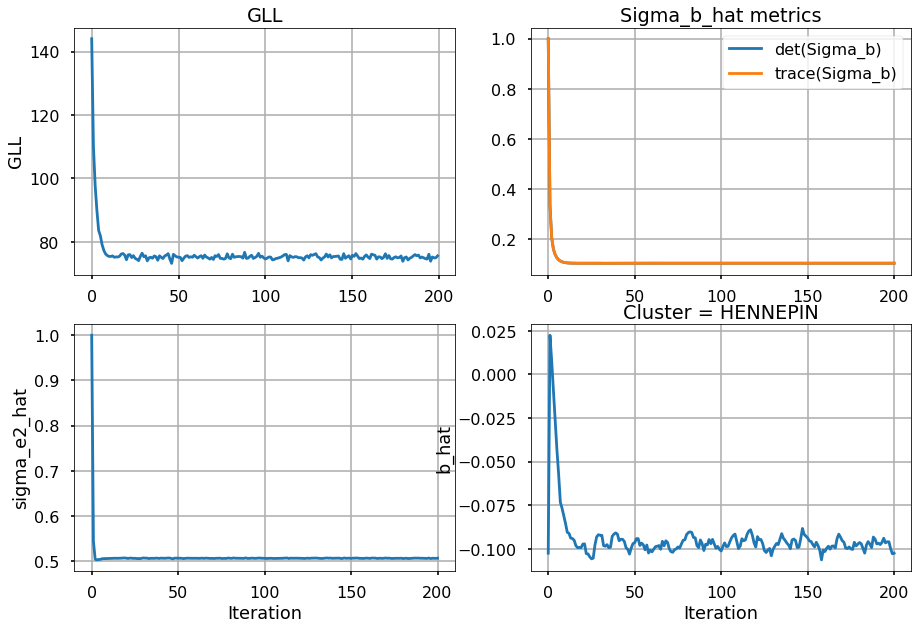

In [28]:
plot_training_stats(mrf)

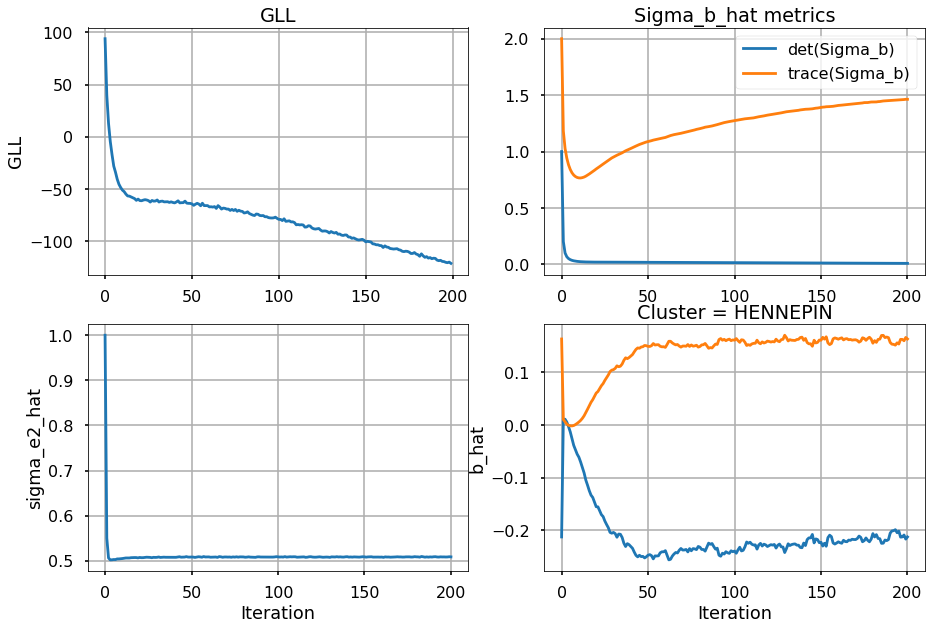

In [29]:
plot_training_stats(mrf_uranium)

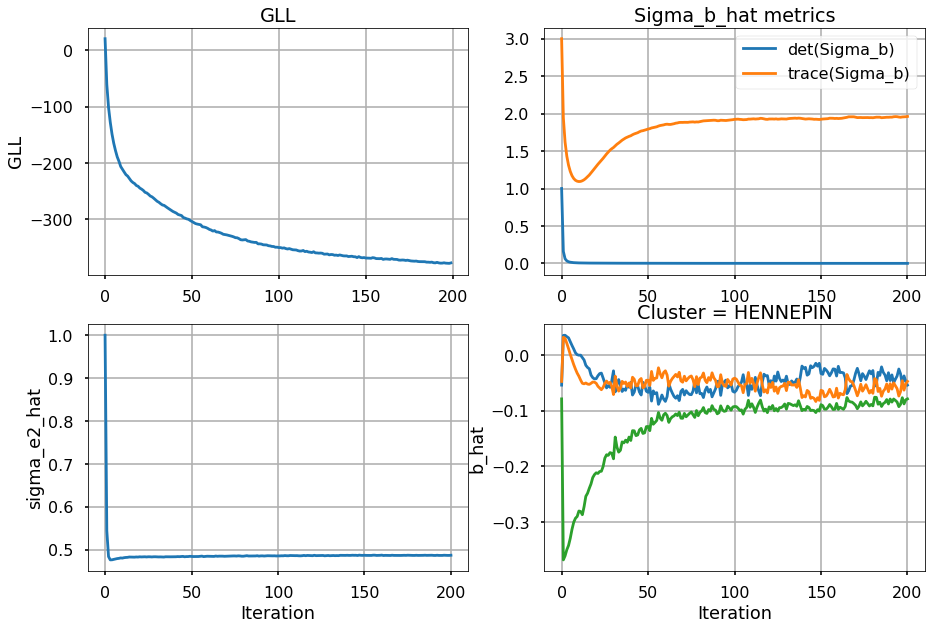

In [30]:
plot_training_stats(mrf_all)

/Users/souravdey/.virtualenvs/merf/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  """Entry point for launching an IPython kernel.


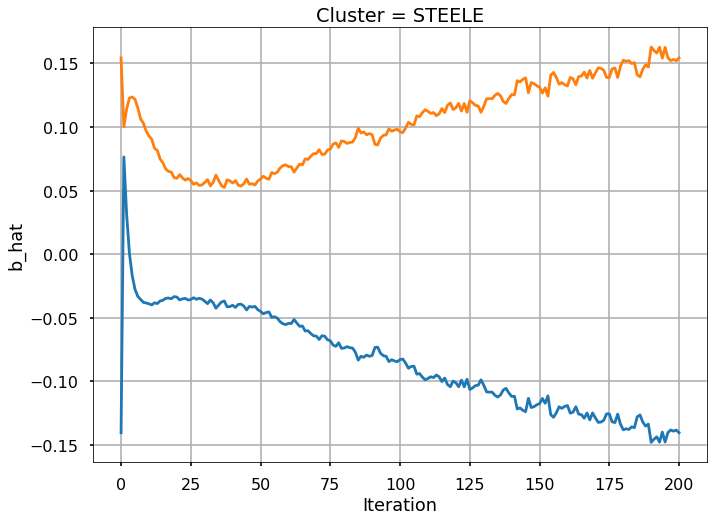

In [48]:
bb = plot_bhat(mrf_uranium, 23)

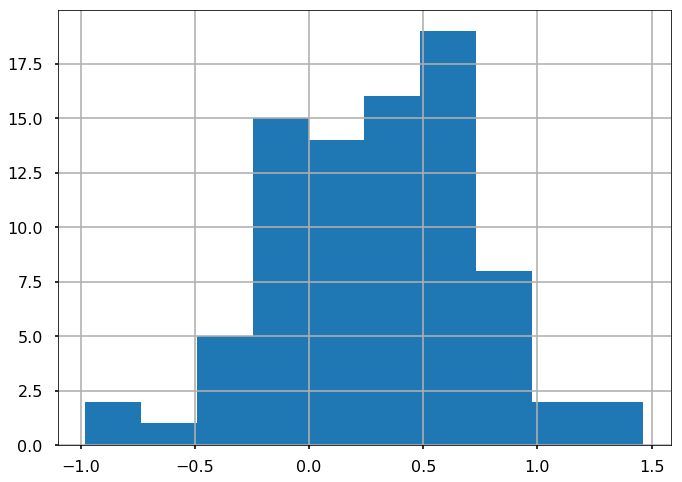

In [45]:
mrf_uranium.b_hat_history[-1][1].hist()